# **Image Based Cleanliness Assessment Using InceptionV3**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.applications import ResNet50, MobileNetV2, EfficientNetB0,InceptionV3
import numpy as np
import random

In [ ]:
# Set seed
seed_value = 39
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
# Configs
batch_size = 32
img_size = (224, 224)
epochs = 28


In [ ]:
# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/room_images/train",
    label_mode='binary',
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/room_images/val",
    label_mode='binary',
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/room_images/test",
    label_mode='binary',
    image_size=img_size,
    batch_size=batch_size
)


# Predict
probs = model.predict(test_generator)
preds = (probs > 0.5).astype(int).flatten()
true = test_generator.classes

# Data augmentation
mild_augmentation = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.1)
])

Found 502 files belonging to 2 classes.
Found 105 files belonging to 2 classes.
Found 97 files belonging to 2 classes.


Found 502 files belonging to 2 classes.


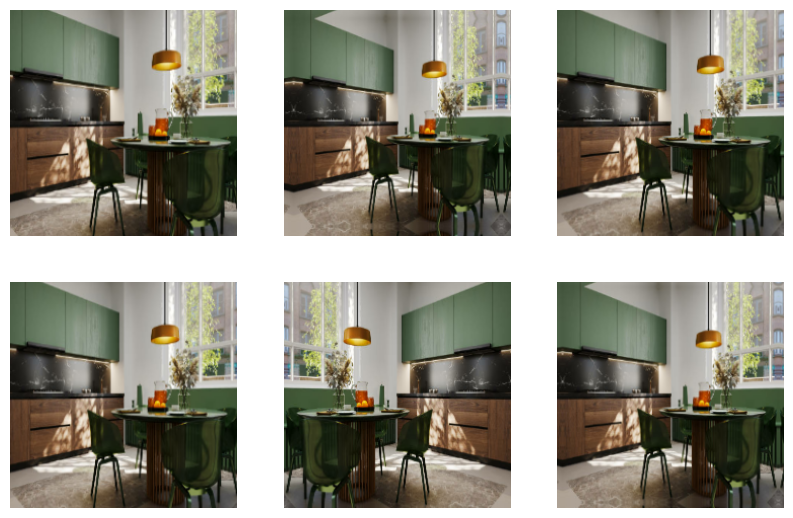

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
# Set seed
seed_value = 39
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Define the augmentation
mild_augmentation = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.1)
])

# Load a few sample images from your dataset
# Assuming you have a directory structure like: dataset/train/class_x/xxx.png
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/room_images/train",  # Change this to your actual path
    image_size=(224, 224),
    batch_size=1,
    shuffle=True
)

# Get one batch
for images, labels in dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(6):
        augmented_image = mild_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy())
        plt.axis("off")
    plt.show()


In [ ]:
# Learning rate scheduler
lr_schedule = LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))


# # Model list
# model_list = {
#     "InceptionV3": InceptionV3,
#     # "ResNet50": ResNet50,
#     # "MobileNetV2": MobileNetV2,
#     # "EfficientNetB0": EfficientNetB0
# }

# # Training loop
# model_histories = {}

# for model_name, model_class in model_list.items():
#     print(f"\n🔁 Training with {model_name}...\n")
# Set seed
seed_value = 39
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

base_model = InceptionV3(input_shape=img_size + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

inputs = tf.keras.Input(shape=img_size + (3,))
x = mild_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs, x)
model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,933,985 (83.67 MB)

 Trainable params: 131,201 (512.50 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# Set seed
seed_value = 39
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history = model.fit(
        train_ds,
        epochs=epochs,
        validation_data=val_ds,
        callbacks=[lr_schedule],
        verbose=2
    )

model_histories[model_name] = history

print("\n✅ Model is trained successfully!")

Epoch 1/28
16/16 - 108s - 7s/step - accuracy: 0.5299 - loss: 0.8599 - val_accuracy: 0.6476 - val_loss: 0.6019 - learning_rate: 1.0000e-04
Epoch 2/28
16/16 - 132s - 8s/step - accuracy: 0.6793 - loss: 0.6420 - val_accuracy: 0.8000 - val_loss: 0.4633 - learning_rate: 1.1220e-04
Epoch 3/28
16/16 - 144s - 9s/step - accuracy: 0.7092 - loss: 0.5600 - val_accuracy: 0.8381 - val_loss: 0.4063 - learning_rate: 1.2589e-04
Epoch 4/28
16/16 - 140s - 9s/step - accuracy: 0.7988 - loss: 0.4588 - val_accuracy: 0.8286 - val_loss: 0.3780 - learning_rate: 1.4125e-04
Epoch 5/28
16/16 - 136s - 8s/step - accuracy: 0.7968 - loss: 0.4188 - val_accuracy: 0.8381 - val_loss: 0.3392 - learning_rate: 1.5849e-04
Epoch 6/28
16/16 - 88s - 6s/step - accuracy: 0.8267 - loss: 0.3865 - val_accuracy: 0.8476 - val_loss: 0.3264 - learning_rate: 1.7783e-04
Epoch 7/28
16/16 - 142s - 9s/step - accuracy: 0.8367 - loss: 0.3560 - val_accuracy: 0.8667 - val_loss: 0.3096 - learning_rate: 1.9953e-04
Epoch 8/28
16/16 - 143s - 9s/step -

NameError: name 'model_histories' is not defined

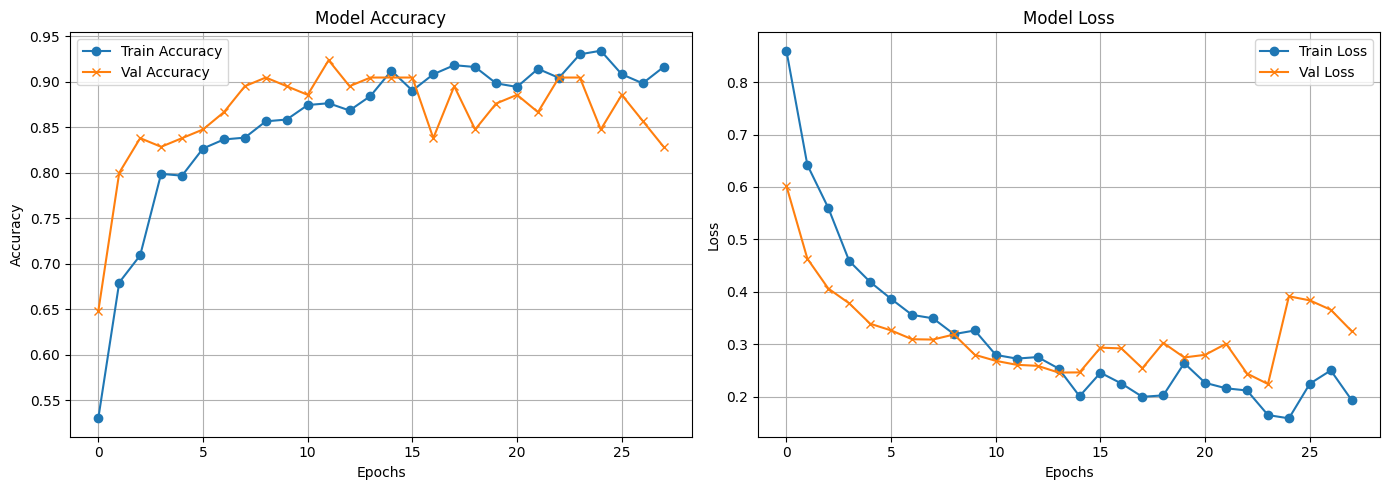

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

import matplotlib.pyplot as plt

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Val Accuracy', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Val Loss', marker='x')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model on validation set
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.8543 - loss: 0.2991
Validation Accuracy: 82.86%


In [ ]:
# Evaluate
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy:.2%}")

# # Predict
# probs = model.predict(test_ds)
# preds = (probs > 0.5).astype(int).flatten()
# true = test_ds.classes

import numpy as np

# Collect predictions and true labels together in one loop (efficient)
y_true = []
y_pred = []

for images, labels in test_ds:
    probs = model.predict(images, verbose=0)
    preds = (probs > 0.5).astype(int).flatten()  # binary classification

    y_true.extend(labels.numpy())
    y_pred.extend(preds)

# Convert to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)




4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.8942 - loss: 0.2532
Test Accuracy: 88.66%


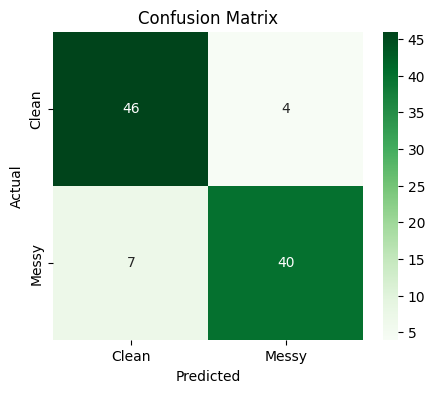

              precision    recall  f1-score   support

       Clean       0.87      0.92      0.89        50
       Messy       0.91      0.85      0.88        47

    accuracy                           0.89        97
   macro avg       0.89      0.89      0.89        97
weighted avg       0.89      0.89      0.89        97



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Clean", "Messy"],
            yticklabels=["Clean", "Messy"])


plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=["Clean", "Messy"]))



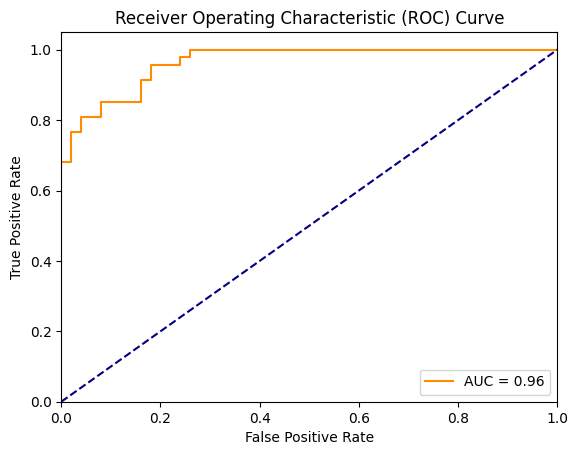

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted probabilities
y_true = []
probs = []

# Loop over the test dataset
for images, labels in test_ds:
    y_true.extend(labels.numpy())  # Append true labels
    probs_batch = model.predict(images, verbose=0)  # Get predicted probabilities
    probs.extend(probs_batch.flatten())  # Flatten to ensure 1D array

# Convert lists to numpy arrays
y_true = np.array(y_true)
probs = np.array(probs)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


